# Exploratory analysis on the Iris Dataset

## 1. Import required packages and Load and Clean Iris Dataset 

### 1.1 Import required packages

In [23]:
# Working with multidimensional number arrays
import numpy as np
# Plotting
from matplotlib import pyplot as plt
# Working with dataframes
import pandas as pd
# AnchoredText helps to add texts on a pyplot plots
from matplotlib.offsetbox import AnchoredText

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm

# One Way Anova
from statsmodels.formula.api import ols

# Post-Hoc Tukey Test
import statsmodels.stats.multicomp as mc

# Welch's ANOVA
from statsmodels.stats.oneway import anova_oneway

### 1.2 Load the Iris data set

In [2]:
# Load the iris dataset
# The iris.data file does not have a header, hence, header=None,
# otherwise, the first row will become a header.
df = pd.read_csv("iris.data", header=None)

# Check out the first five rows of the df
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.3 Load the metadata of the Iris data set with 'with open()' function

If you only use open(), then you must use close() once you finished using a file. The file will stay open in a system and it will consume system's resources if you forget to specify close(). The method 'with open()' ensures that a file will be closed after its use to spare a system's resources.

*See ref on how to use 'with open()' to savely open and close files  
https://note.nkmk.me/en/python-file-io-open-with/*

In [3]:
# rt means to read a text file where r stands for read and t for text file
with open("iris.names", "rt") as file:
    content = file.read()
    print(content)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

### 1.4 Extract the attribute information from the metadata file

In the code cell above, we opened the metadata file of the Iris data set and we found five attributes that correspond to five columns in the iris.data file, respectively: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm and class. We will label the five columns of the Iris data set with those attributes.

In [4]:
# Create an object with features' names of numerical variables plus class of categorical variables
feature_names = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']
# Set the column names as feature names
df.columns = feature_names + ["species"]
# Check out the head of df
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.5 Clean the df

In the code cell below, we will (1) check if the columns contains nan values and (2) we will clean class column that contains categorical variables about Iris dataset. 
1. We will replace missing values with appropriate information. We will replace missing numerical values with zero and remove samples that does not have class information. Firstly, pd.isna() outputs the df the same size as the input, although, the cells contain Boolean values. The cell becomes False if it does not contain nan, else, the cell becomes True if it does contain nan. This allows us to use .sum() function and see a broader picture if any of the column contains nan values. sum() considers True as the value 1 and False as the value 0, hence, we should see the total sum of 0 if the columns does not contain nan.
2. All values in the class column contains 'Iris-' prefix which is not necessary in this analysis. We already know that these samples comes from Iris genus and we can keep only a species name to keep only informative details of samples.

*See ref. on how to get the string variables of a pandas df column:  
https://note.nkmk.me/en/python-pandas-str-replace-strip-etc/*

In [5]:
# Check if columns do have nan values
pd.isna(df).sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

In [6]:
# Remove Iris- prefix from all values in the class column
df["species"] = df["species"].str.replace("Iris-", "")
# Show the head of df
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Summary statistics
### 2.1 Calculate summary statistics


*Calculate mean, standard deviation, minima, maxima and median with numpy  
https://numpy.org/doc/stable//reference/routines.statistics.html*

*Calculate percentiles and quartiles with numpy  
https://numpy.org/doc/2.1/reference/generated/numpy.quantile.html*

*Built-in python function round() to round numbers to a certain decimal point  
https://docs.python.org/3/library/functions.html*

*Replace certain value in a string with another value  
https://www.w3schools.com/python/ref_string_replace.asp*

*Create an empty numpy array  
https://numpy.org/doc/2.1/reference/generated/numpy.empty.html*

*See ref. on how to access specific rows and columns in pandas df  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html*

*Function enumerate() allows to loop through an object while returning number of iterations  
https://www.geeksforgeeks.org/enumerate-in-python/*

In [7]:
adict = dict()
features = df.columns[:4]
statistics = ["mean", "std", "min", "max", "Qone", "Qtwo", "Qthree"]

for feature in features:

    feature_series = df[feature]
    
    mean = round(np.mean(feature_series), 2) # Compute mean
    std = round(np.std(feature_series), 2) # Compute standard
    minima = round(np.min(feature_series), 2) # Compute minimum
    maxima = round(np.max(feature_series), 2) # Compute maximum
    Qone = round(np.quantile(feature_series,0.25), 2) # Compute first quartile
    Qtwo = round(np.median(feature_series), 2) # Compute second quartile
    Qthree = round(np.quantile(feature_series,0.75), 2) # Compute third quartile
    
    adict[feature] = [mean, std, minima, maxima, Qone, Qtwo, Qthree]

sum_stats = pd.DataFrame(adict)
sum_stats.index = [statistics]
sum_stats

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
max,7.90,4.40,6.90,2.50
Qone,5.10,2.80,1.60,0.30
Qtwo,5.80,3.00,4.35,1.30
Qthree,6.40,3.30,5.10,1.80


### 2.2 Save summary statistics to a text file

*Convert pandas df to a text file  
https://saturncloud.io/blog/how-to-write-a-pandas-dataframe-to-a-txt-file/#:~:text=txt%20File-,To%20write%20a%20Pandas%20dataframe%20to%20a%20.,txt*

In [8]:
sum_stats.to_csv('sum_stats.txt', sep='\t', index=True)

## 3. Explonatory analysis of the Iris dataset

In this section, we will plot histograms, KDE plots, and scatter plots to explore the distribution of each feature and correlations between each pair of the features. This allows to understand better what features does the dataset have and what further tests we can perform on them.

### 3.1 Initial examination of the datasets, Stacked Bar Histogram and KDE plot

In here we wil plot histograms and KDE plots of each feature. We will divide data points into three groups, corresponding to each class. These plots will show the distribution of each class compared to other classes. In the histogram you can see the data points subgrouped into certain size bars and plotted as frequency on the x-axis. In comparison, KDE plot is another alternative to a histogram, although, the data in the KDE plot is less clustered and more inpretable (see ref https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

In the code cell below, we will iterate through each feature and within each iteration we will plot a histogram and a KDE plot.

*Histogram plotting  
https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/ & https://matplotlib.org/stable/gallery/statistics/hist.html*

*String capitalisation  
https://www.w3schools.com/python/ref_string_capitalize.asp*

*Subplotting with matplotlib  
https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html#sphx-glr-users-explain-axes-constrainedlayout-guide-py*

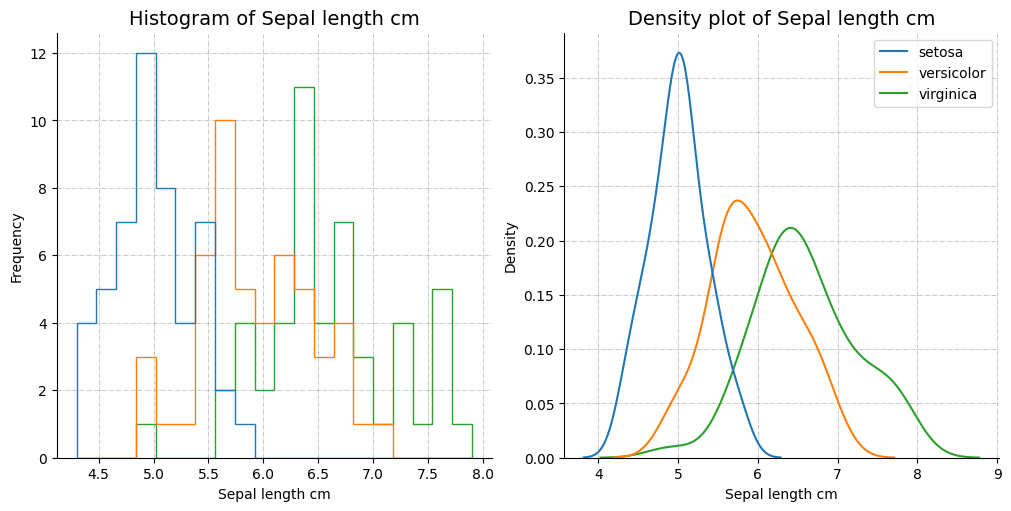

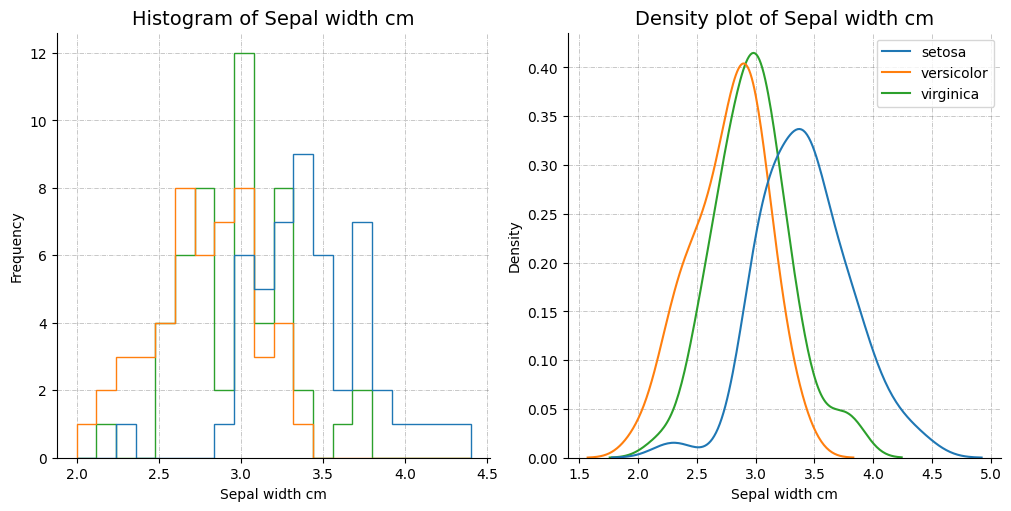

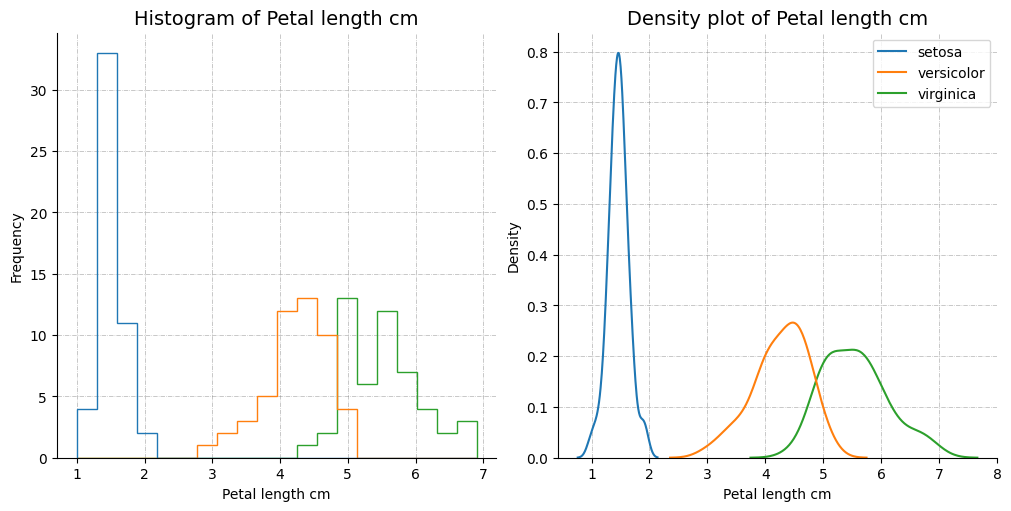

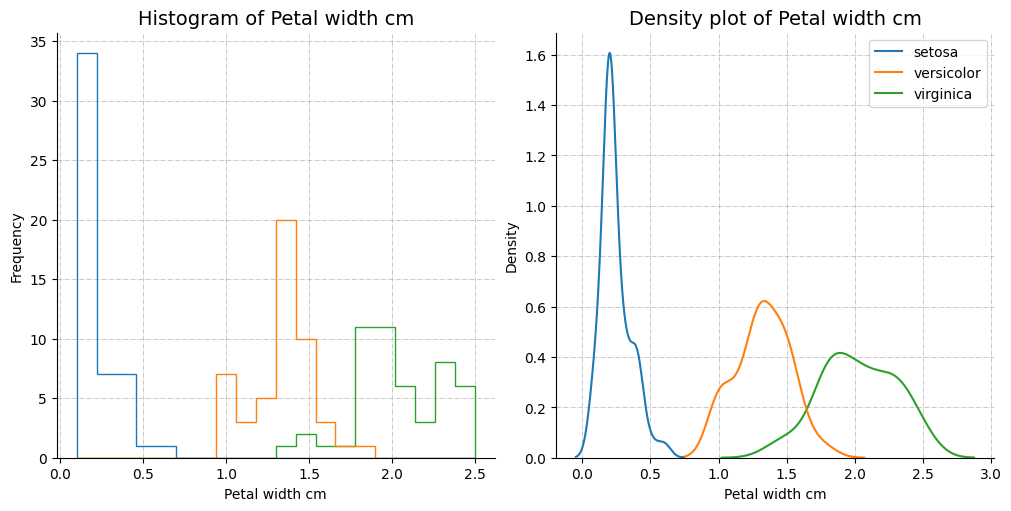

In [9]:
# Iterate through each feature and plot a histogram and KDE plot
for feature in features:
    
    # Define an object with classes names
    # .unique() function allows to get the unique values from the column 
    classes = list(df.iloc[:,4].unique())
    # Replace underscores with an empty space in the feature name
    # This feature name will be used for naming axes and titles 
    feature_name = feature.replace("_", " ")
    
    
    # Define a layout 1x2 of subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
    
    # Flatten out the axis so you could iterate through each of them
    axs = axs.flat

    # Iterate through axis and track the # of iterations with enumerate()
    for count, ax in enumerate(axs):

        # Remove axes splines 
        for s in ['top', 'right']: 
            ax.spines[s].set_visible(False) 

        # Add x, y gridlines 
        ax.grid(color ='grey', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.6)
        
        # This if statement tracks the first iteration and plots a histogram
        if count == 0:
            # Create a temporary list with three sublists for each class
            # Such structure of a list is necessary so that pyplot function
            # hist() would automatically detect three different groups
            temp_df = [df[feature][:50], df[feature][50:100], df[feature][100:]]
            # Plot a histogram of the feature
            # Choose the step type due to better visibility
            ax.hist(temp_df, bins=20, histtype="step")
            # Set the x-axis name
            ax.set_xlabel(f"{feature_name.capitalize()}", fontsize=10)
            # Set the y-axis name
            ax.set_ylabel("Frequency", fontsize=10)
            # Set the subfigure title
            ax.set_title(f"Histogram of {feature_name.capitalize()}", fontsize=14)
            
        else:
            # Create an empty pandas df.
            # You will use this empty df later in the for loop 
            # to add the data of each class in their own column
            temp_df = pd.DataFrame()
            # Iterate three times to add each class in their own column
            for i in range(3):
                # Select samples of a particular class 
                temp_df1 = df[df.iloc[:,4] == classes[i]]
                # Select data for a particular feature
                temp_df2 = temp_df1[feature]
                # Add the data, of a particular class, as a new column of the previously defined df  
                temp_df[classes[i]] = list(temp_df2)
            # Plot a KDE plot
            sns.kdeplot(temp_df, ax=ax)
            # Define x-axis label
            ax.set_xlabel(f"{feature_name.capitalize()}", fontsize=10)
            # Define y-axis label
            ax.set_ylabel("Density", fontsize=10)
            # Define y-axis label
            ax.set_title(f"Density plot of {feature_name.capitalize()}", fontsize=14)
    
    
    # Show the figure
    plt.show()

### 3.2 Plot scatter plots of all feature pairs 
In this section, we will plot scatter plots of each feature pair. The plots will also contain a regression line and an $R^{2}$ value to show proportion of variation in the dependent variable that is controlled by an independent variable. This will allow us to see correlations between the pairs of the features.

#### 3.2.1 Calculate $R^{2}$

To calculate an $R^{2}$ we will use the following equation: $R^{2} = 1 - \frac{SS_{res}}{SS_{tot}} = 
\frac{\sum (y_{i} - \hat{y}_{i})^2}{\sum (y_{i} - \bar{y})^2}$, where $\hat{y}_{i}$ is a predicted y value at the $i_{th}$ instance and $\bar{y}$ is the mean of y (*see ref. https://www.youtube.com/watch?v=lng4ZgConCM&t=6s*). To get $\hat{y}_{i}$, we need to get the equation of a regression line (*see ref. https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-calculate-a-regression-line-169795/*).

The equation of a regression line is $\hat{y} = mx + b$. So far, we know only an x variable and we need to find the slope, m, and intercept, b, variables. The formula to get the slope is $m = r * \frac{y_{std}}{x_{std}}$, whereas, the formula to get the intercept of the regression line is $b = y_{mean} - m*x_{mean}$. It means that we must first find the correlation coefficient, r, before we can get the slope and the intercept. The formula for the correlation coefficient is: $ r=\frac{\sum (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum (x_{i}-\bar{x})^{2} \sum (y_{i}-\bar{y})^{2}}}$ (*see ref. https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/strength-of-correlation.html*).

Hence, to find $R^{2}$, we need to complete these steps:
1. Find correlation coefficient, r.
2. Find the slope, m, of the regression line.
3. Find the intercept, b, of the regression line.
4. Lastly, find the $R^{2}$.

#### 3.2.2 Plot a regression line on the scatter plot
After we will get all required variables to calculate an $R^{2}$, then, we can get the cordinates of a regression line using the equation of a line, $y =m*x+b$, and plot it on the scatter plot.

#### 3.2.3 Define a function to calculate correlation coefficient, r

In this code block we will use the following equation to define a function to compute correlation coefficient,  $ r=\frac{\sum (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum (x_{i}-\bar{x})^{2} \sum (y_{i}-\bar{y})^{2}}}$

In [10]:
def find_r(df_x, df_y):
    
    # Calculate x and y means
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    
    # Calculate the nominator
    nominator = sum([(x - x_mean)*(y - y_mean) for x, y in zip(df_x, df_y)])
    # Calculate the denominator
    denominator = (sum([(x - x_mean)**2 for x in df_x]) * sum([(y - y_mean)**2 for y in df_y]))**0.5
    # Calculate correlation coefficient
    r = (nominator / denominator)
    
    # Return correlation coefficient
    return r

#### Define a function to calculate $R^{2}$

Here we will define a function to calculate $R^{2}$ based on this equation $R^{2} = 1 - \frac{SS_{res}}{SS_{tot}} = 
\frac{\sum (y_{i} - \hat{y}_{i})^2}{\sum (y_{i} - \bar{y})^2}$

In [11]:
# Define a function to calculate R^2
def rsquared(df, x, y, sum_stats=sum_stats):
    
    
    # Define x variable
    df_x = df[x]
    # Define y variable
    df_y = df[y]
    
    
    # Calculate the mean and standard deviation of x and y 
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    x_std = (sum([(x - x_mean)**2 for x in df_x])/(len(df_x)-1))**0.5
    y_std = (sum([(y - y_mean)**2 for y in df_y])/(len(df_y)-1))**0.5
    
    
    # Calculate correlation coefficient, r
    r = find_r(df_x,df_y)
    
    # Find the slope of the regression line, m
    m = r * (y_std / x_std)

    # Find the intercept of the regression line, b
    b = y_mean - m*x_mean
    
    
    # Get the Residual Sum of Squares
    SE_line = 0
    for i in range(len(x)):
        SE_line += (df_y[i] - (m*df_x[i] + b))**2
    
    
    # Get the Total Sum of Squares
    SE = 0
    for i in range(len(y)):
        SE += (df_y[i] - y_mean)**2
    
    
    # Use the formula above to calculate R^2
    r_squared = 1 - (SE_line / SE)
    
    return round(r_squared, 2) # Round R^2 to two decimal places

#### Define a function to plot a regression line

The function below generates cordinates of a regression line given the sets of x and y data points. The formula for a line is $y=m*x+b$. To find y cordinates of a regression line, we need to find m and b variables and plug in any x value in the equation. We will use the formulas defined above to get m and b variables. Then, we will generate a range of xs values and plug them in into the equation one by one to get corresponding y values. These xs and ys values will represent the cordinates of a regression line of x and data sets.

*Calculate standard deviation  
https://www.investopedia.com/terms/s/standarddeviation.asp*

In [12]:
def regression_line(df_x, df_y):
    
    # Calculate x and y means
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    x_std = (sum([(x - x_mean)**2 for x in df_x])/(len(df_x)-1))**0.5
    y_std = (sum([(y - y_mean)**2 for y in df_y])/(len(df_y)-1))**0.5
    
    # Find the slope, m
    m = find_r(df_x, df_y) * (y_std/x_std)
    # Find the intercept, b
    b = y_mean - m * x_mean
    
    # Generate a range of x values
    xs = np.linspace(min(df_x), max(df_x), num=100)
    # Calculate y cordinates using the equation of a line
    y_hats = [(x*m + b) for x in xs]
    
    # Return x and y cordinates of a regression line
    return xs, y_hats

#### Define a function to plot a scatter plot

*Set a suptitle for a main figure  
https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots*

*Set a legend for a figure  
https://stackoverflow.com/questions/74021364/how-to-use-legend-only-once-in-a-subplot-for-a-for-loop*

*Change the size of a figure  
https://stackoverflow.com/questions/7125009/how-to-change-legend-fontsize-with-matplotlib-pyplot*

*numpy.plofit() function  
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html*

*Create a polynomial numpy matrix  
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html*

*Anchored text  
https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-plot*

In [13]:
def plot_scatter(df, ax, feature1, feature2):
    
    #---- Step 1.
    """"Plot a scatter plot of a feature pair. 
    In this step, we will use a foor loop to plot a only a single 
    class samples on the axes through each iteration. 
    This allows to colour code data points based by class and use a 
    function to automatically create a legend for a plot."""
    
    # Plot three scatter plots for each type
    for name in df["species"].unique():

        # Create a temporary df with details for a single type 
        temp_df = df[df["species"] == name]

        # Select x and y cordinates as petal length and width, resptectively
        x = temp_df[feature1]
        y = temp_df[feature2]

        # Plot a scatter plot with previously defined cordinates and
        # use type name as the label of the legend
        ax.scatter(x, y, label=name)

    #---- Step 2. Plot a regression line on the axis.
    # Get the x and y cordinates for a regression line
    xs, y_hats = regression_line(df[feature1], df[feature2])
    # Plot a regression line
    ax.plot(xs, y_hats, color="red")

    #---- Step 3. Calculate R^2 and add it to the scatter plot.
    # Calculate an R^2
    r_squared = rsquared(df, feature1, feature2)
    
    
    # Add the text inside the plot which is R^2 value defined above
    anchored_text = AnchoredText(f"$R^{2}$={r_squared}", loc=2)
    ax.add_artist(anchored_text)
    
    #---- Step 4. Add the x and y axes names
    # Define the name of the first feature
    # Replace underscore with space and capitalise the first letter
    feature1_name = feature1.replace("_", " ").capitalize()
    # Define the name of the second feature
    # Replace underscore with space and capitalise the first letter
    feature2_name = feature2.replace("_", " ").capitalize()
   
    # Name x and y axes
    ax.set_xlabel(feature1_name)
    ax.set_ylabel(feature2_name)

#### Plot scatter plots of the features

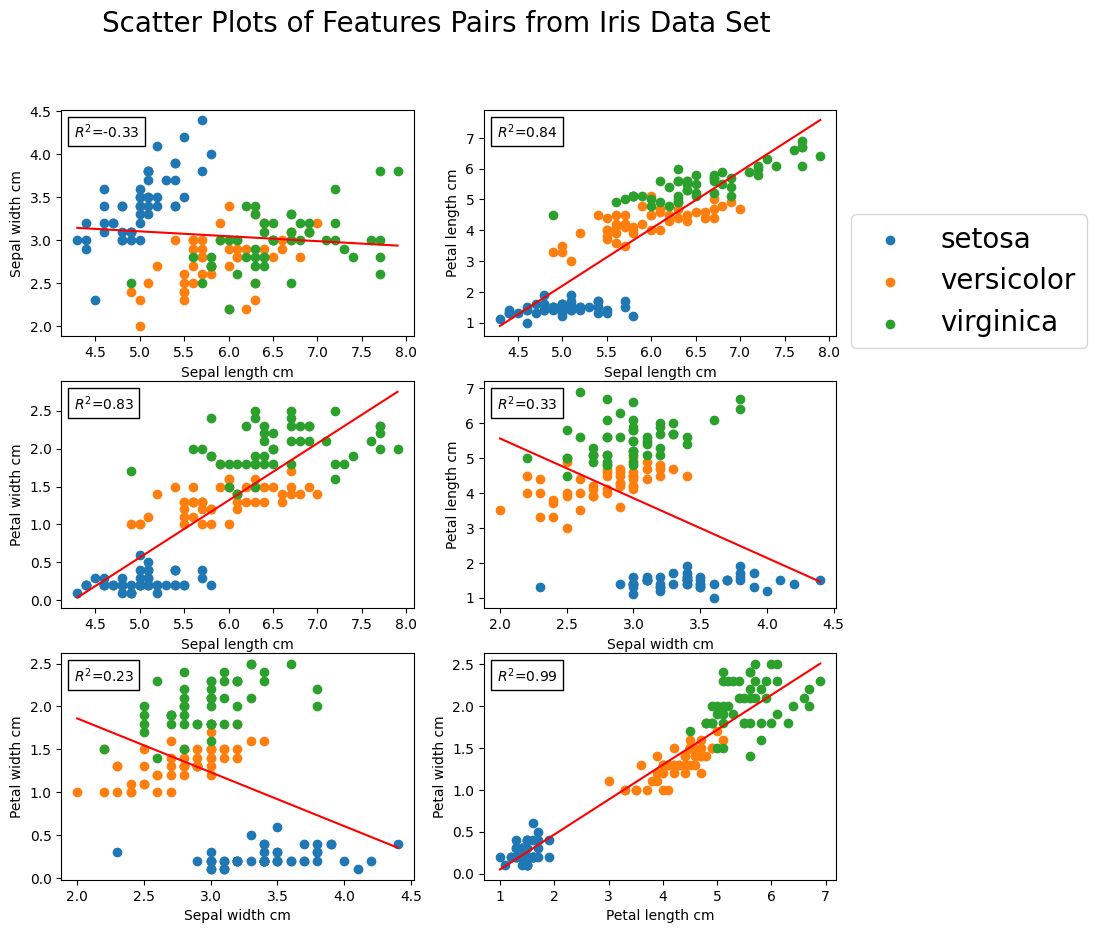

In [14]:
#---- Step 1.
""""
To have all scatter plots on the same figure, we will create a subplot 
layout with 6 axes for each feature pair. This step returns two items, 
fig and axs, where fig stands for a figure and axs stands for 6 axs. 
If we want to modify global view of the figure, then we have to use a fig object, 
else, use axs object to edit the axes."""

# Define a layout of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))


#---- Step 2.
# Use a for loop to go through each axis in the axs object and plot a scatter plot.
# Flatten out the axs object
axs = axs.flat

# We will use count to track the # of scatter plots and used axes
count = 0

# Define features names
features = df.iloc[:,:4].columns

# Go through each axis in the previously defined layout 
# and plot a scatter plot of the feature pair.
for i in range(len(features) - 1):
    plot_scatter(df, axs[count], features[i], features[i+1])
    # add one after using an axis
    count += 1
    
    # Checks if i+2 is not larger than 3,
    # else, it plots the feature pair i and i+2
    if i+2 < 4:
        plot_scatter(df, axs[count], features[i], features[i+2])
        # add one after using an axis
        count += 1
        
    # Checks if i+3 is not larger than 3,
    # else, it plots the feature pair i and i+3
    if i+3 < 4:
        plot_scatter(df, axs[count], features[i], features[i+3])
        # add one after using an axis
        count += 1

#---- Step 3.
# Define the fine details of a figure such as legend and title.
# Set the legend of the figure
# df["class"].unique() gives the names of the three Iris classes
plt.legend(df["species"].unique(), bbox_to_anchor=(1.75, 3), ncol=1, prop={'size': 20})
# Set the title of a figure
fig.suptitle("Scatter Plots of Features Pairs from Iris Data Set", fontsize=20)
# Show the figure
plt.show()

## 4. Difference Between Iris Classess

In this section, we will examine the differences between three Iris species—Iris setosa, Iris versicolor, and Iris virginica—across four features: sepal length, sepal width, petal length, and petal width. The most suitable method to test for differences between three or more groups for a single dependent variable is ANOVA (Analysis of Variance). Several ANOVA types are suitable for datasets with different properties. For instance, if the dataset has only one independent variable (factor), then a One-Way ANOVA is appropriate. On the other hand, for datasets with two independent variables, a Two-Way ANOVA is the right choice, and for datasets with three or more independent variables, PERMANOVA (Permutational Multivariate Analysis of Variance) is often the optimal choice, especially when dealing with multivariate data. However, ANOVA relies on three key assumptions: the data must be normally distributed, must exhibit homoscedasticity (homogeneous variance), and the data points must be independent. If a dataset does not meet the normality or homoscedasticity assumptions, it can sometimes be transformed to see if these assumptions are met after the transformation. If the dataset still does not meet the assumptions even after data transformations, then we can choose from several ANOVA methods suitable for datasets that do not meet these assumptions. In this case, we will use Welch's ANOVA to test for differences between classes in datasets that violate these assumptions. Furthermore, if the dataset does not meet the independence assumption, then it is not suitable for further analyses and should ideally be resampled.

To determine which type of ANOVA we should use, we will assess normality using histograms and QQ-plots of the residuals, homoscedasticity with a residuals versus fitted values plot, and the independence of data points by plotting residuals versus ordered values. In addition to these visual aids, we will further test normality and homoscedasticity using the Shapiro-Wilk test and Levene's test, respectively. If the data meet all the assumptions, then we will use the One-Way ANOVA method. The One-Way ANOVA method is suitable for datasets that meet all assumptions and have only one independent variable; in our case, the independent variable is species. Nonetheless, if the data are not normally distributed or do not have equal variances, we have two options: either transform the data or perform Welch's ANOVA, which is a suitable method for datasets that do not meet the standard ANOVA assumptions. Before deciding to use Welch's ANOVA, we will explore data transformations. There are many ways to transform data, but here we will use five methods: square root, logarithm, squaring, exponential, and reciprocal transformations. If the data meet the assumptions after transformation, then we will use the transformed data with a One-Way ANOVA. However, if none of the transformations successfully allow the data to meet all the assumptions, then we will use Welch's ANOVA. In addition, if the data do not meet the independence criterion, then we either have to collect new samples in a way that ensures independence or include the variable causing the dependence in the statistical model.

### 4.1 Visual Examination of Normality, Homogeneity of variance, Independence

In this code block, we will generate visualizations to assess the assumptions of our statistical analysis. Specifically, we will plot a histogram of the residuals and a Quantile-Quantile (QQ) plot of theoretical versus residual quantiles to examine the normality of the data. Homoscedasticity (equal variance) will be evaluated using a scatter plot of residuals against fitted values. Finally, the independence of the data points will be checked by plotting residuals against their ordered values. Residuals, in this context, represent the difference between an observed data value and its corresponding predicted data value (see ref. https://www.displayr.com/learn-what-are-residuals/). Here, the observed value is a data point from our Iris dataset, and the predicted value is the mean value of the species group to which that data point belongs.

While we could assess the overall normality or variance by plotting the observed values, this would necessitate creating separate plots for each species. In contrast, plotting the residuals allows us to examine these assumptions for the entire dataset, encompassing all species, on a single plot. The residuals of the entire dataset provide a consolidated view, as the residuals within each species group sum to zero, effectively removing the inherent variability between the original group means and allowing for a more direct assessment of the underlying assumptions.

The histogram of the residuals visually represents the data's distribution, and we look for a bell-shaped curve indicative of normality. The QQ-plot, a graphical comparison of the theoretical quantiles of a normal distribution against the quantiles of our residuals, helps us further assess normality. In this plot, we expect the points to fall approximately along a straight line. Deviations from this straight line suggest departures from normality. To evaluate the homogeneity of variance, we will examine the scatter plot of residuals versus fitted values. Ideally, we should observe a roughly equal spread of residuals across the range of fitted values, without any systematic patterns or funneling, which would indicate unequal variances.

Furthermore, to test the independence of the data, we will plot the ordered data values against their corresponding residuals. A random scatter of points in this plot suggests independence. Conversely, any discernible non-random pattern indicates that the data points might be dependent on some unmodeled variable. If the dataset fails to meet the independence criterion, it should ideally not be used for standard ANOVA testing, or at the very least, the variable causing the dependence should be incorporated into a more complex statistical model to account for this dependency when analyzing group differences.

*What does QQ-plot mean?  
https://www.datacamp.com/tutorial/qq-plot?dc_referrer=https%3A%2F%2Fwww.google.com%2F*

*Theory about assessment of normality, equal variance and independence for ANOVA  
https://www.youtube.com/watch?v=1qqTAgamMGw*

*Using matplotlib axes for seaborn plots  
https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface*

*Stats probplot  
https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html*

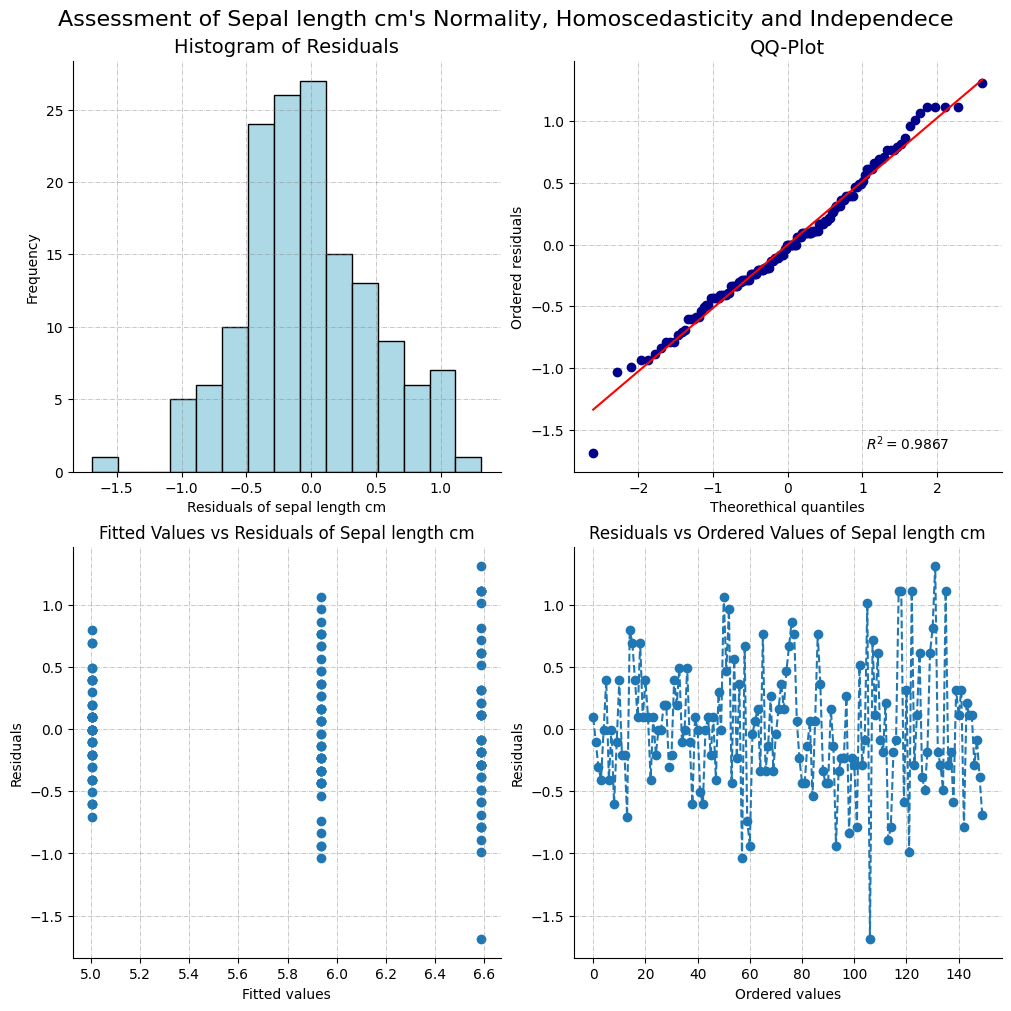

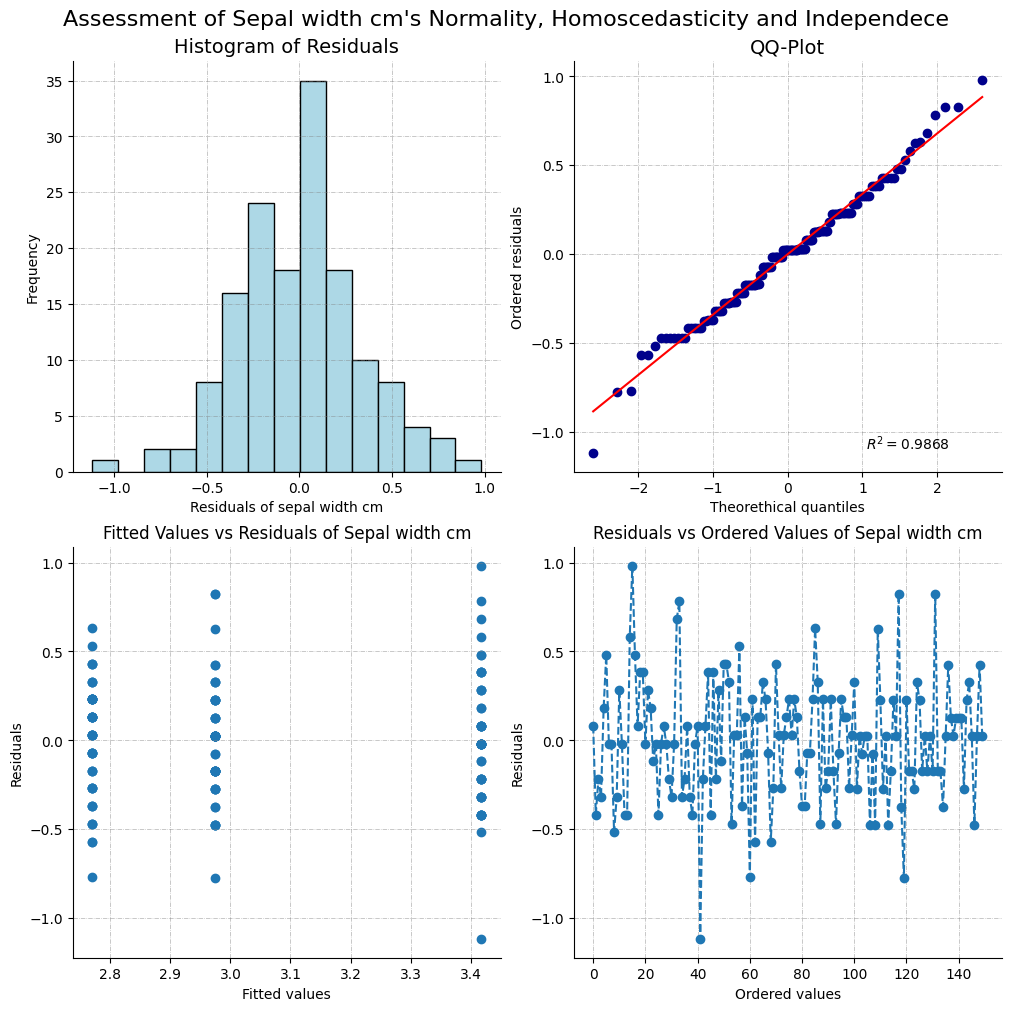

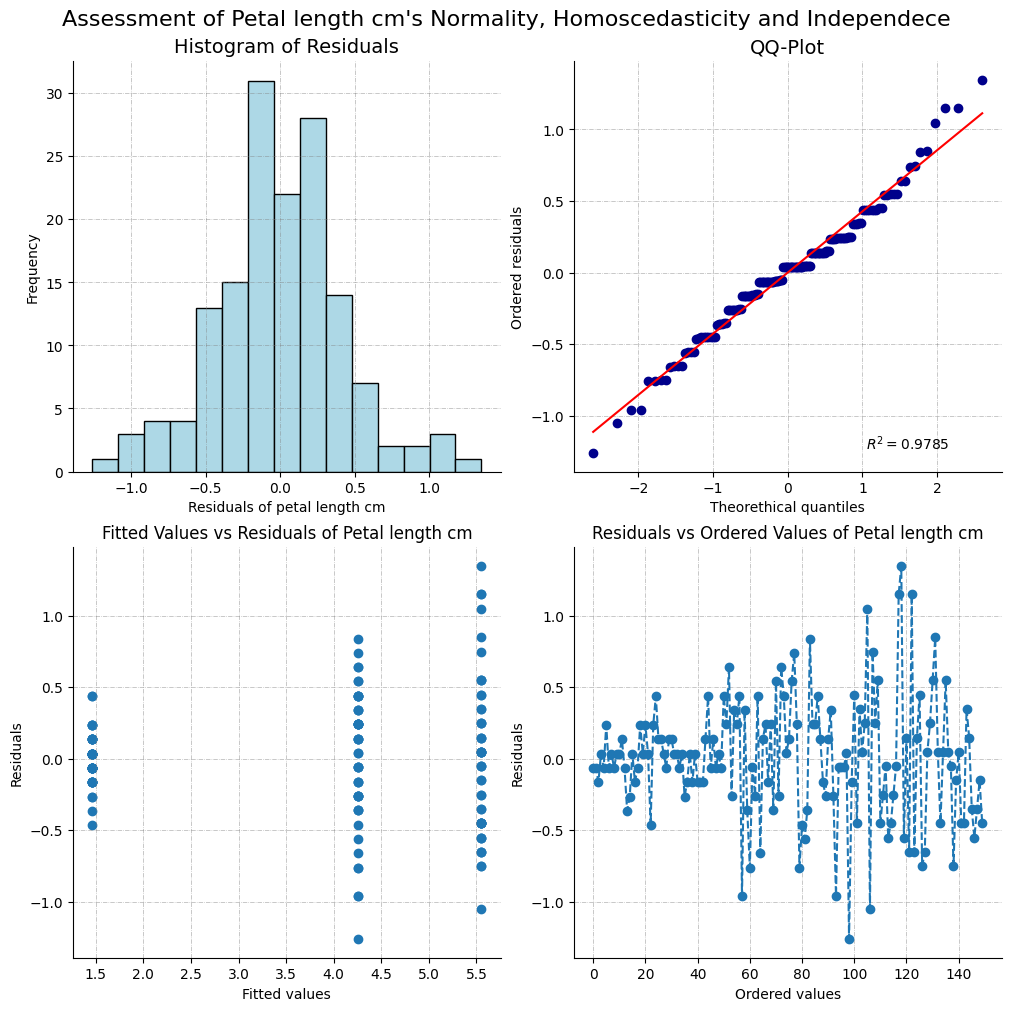

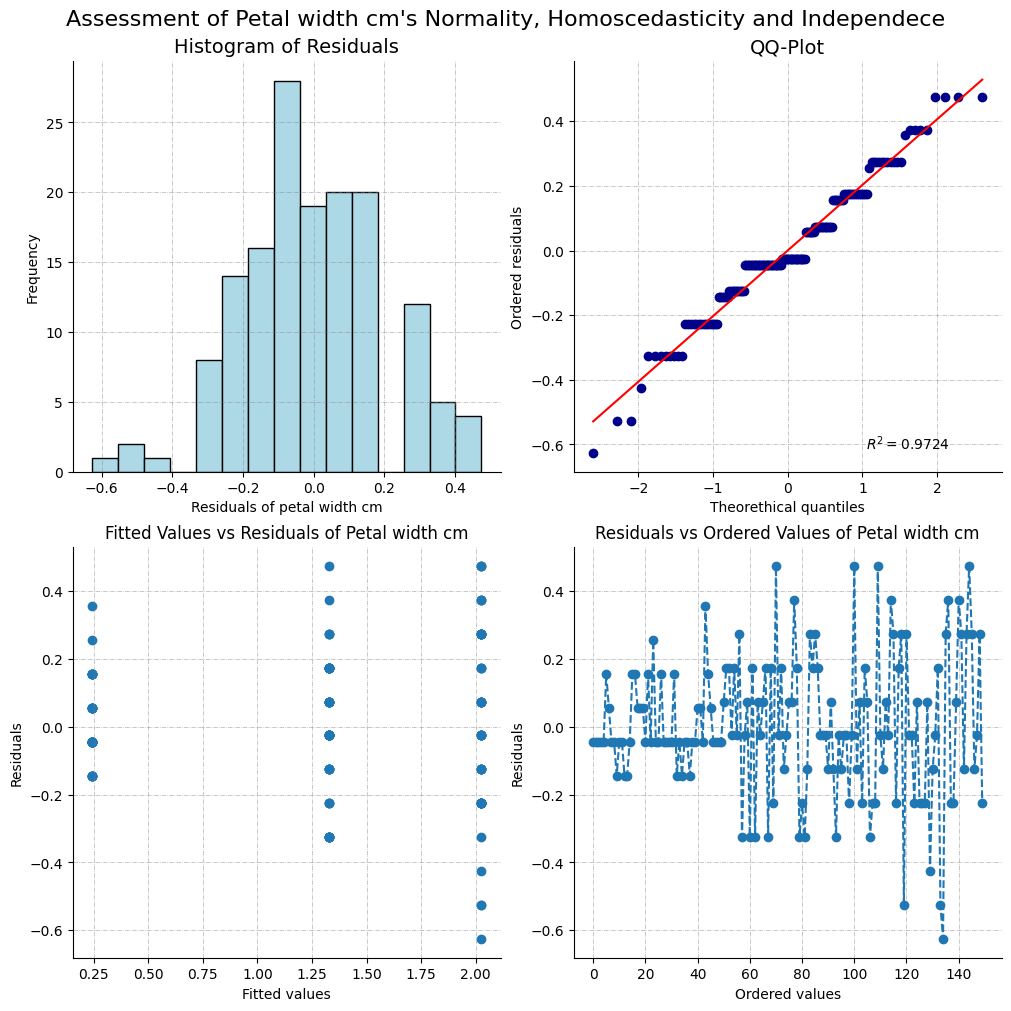

In [15]:
for feature in features:
    
    # Define a layout of subplots
    fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
    
    # Define the classes names
    classes = list(df.iloc[:,4].unique())

    # Define the feature names so you could use for naming axes or titles
    feature_name = feature.replace("_", " ")

    # Calculate residuals of a feature
    # Store residuals
    resid = []
    # Store fitted values
    fitted_values = []
    # Iterate through each class and calculate residuals for a feature
    for aclass in classes:
        # Create a temporary df which contains only one class samples
        temp_df = df[df["species"] == aclass]
        # Select values of a particular feature
        df1 = temp_df[feature]
        # Calculate the mean of a feature for a particular class
        df1_mean = np.mean(df1)
        # Create fitted values for each corresponding residual
        fitted_values += [df1_mean] * len(df1)
        # Compute residuals of a feature for a particular class
        df1_resid = [float(round(x - df1_mean, 3)) for x in df1]
        # Add residuals of a feature to the df that contains residuals of other classes
        resid = resid + df1_resid
    

    # Flatten out the axes so you could iterate through them
    axs = axs.flat
    for count, ax in enumerate(axs):

        # Remove axes splines 
        for s in ['top', 'right']: 
            ax.spines[s].set_visible(False) 

        # Add x, y gridlines 
        ax.grid(color ='grey', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.6)
        
        
        
        if count == 0:
            ax.hist(resid, bins=15, 
                        color="lightblue", edgecolor='black')
            ax.set_xlabel(f"Residuals of {feature_name}", fontsize=10)
            ax.set_ylabel("Frequency", fontsize=10)
            ax.set_title("Histogram of Residuals", fontsize=14)
            
        elif count == 1:
            stats.probplot(resid, dist="norm", plot=ax, rvalue=True)
            ax.lines[0].set_color('darkblue') 
            ax.set_xlabel("Theorethical quantiles", fontsize=10)
            ax.set_ylabel("Ordered residuals", fontsize=10)
            ax.set_title("QQ-Plot", fontsize=14)
        elif count == 2:
            ax.scatter(fitted_values,resid)
            ax.set_xlabel("Fitted values")
            ax.set_ylabel("Residuals")
            ax.set_title(f"Fitted Values vs Residuals of {feature_name.capitalize()}")
        else:
            ax.plot(resid, marker="o", linestyle="--")
            ax.set_xlabel("Ordered values")
            ax.set_ylabel("Residuals")
            ax.set_title(f"Residuals vs Ordered Values of {feature_name.capitalize()}")
            print("""
            
            
            """)

        
    # Set the title
    fig.suptitle(f'Assessment of {feature_name.replace(" (cm)", ""
).capitalize()}\'s Normality, Homoscedasticity and Independece', fontsize=16)
    # Save the plot
    plt.savefig(f"{feature}_assesment_of_norm_var_ind.png", dpi=300, bbox_inches = 'tight')
    # Show the plot
    plt.show()

### Shapiro-Wilk test and Levene's test

In this code block, we will assess the normality with Shapiro Wilk Test and  homoscedasticity with Levene's test. The alpha value = 0.05.

1. Assessment of normality and homoscedasticity with original data. Only the Sepal width dataset (shapiro test p-value=0.32435 and levenes p-value=0.524827) was normally distributed and had homogenous variance with original data. Other three datasets did not meet either one or both of the assumptions. Hence, in the next step, will will perform data transformation on those three features to see if they will meet ANOVA's assumptions after data transformation.  
Shapiro's p-value=0.21886 for sepal_length_cm  
Levene's p-value=0.00225853 for sepal_length_cm  

Shapiro's p-value=0.32435 for sepal_width_cm  
Levene's p-value=0.524827 for sepal_width_cm  

Shapiro's p-value=0.03776 for petal_length_cm  
Levene's p-value=3e-08 for petal_length_cm  

Shapiro's p-value=0.00436 for petal_width_cm  
Levene's p-value=3e-08 for petal_width_cm  
  

2. Assessment of normality and homoscedasticity with transformed data. We will apply five types of data transformations described above: square-root, log, exponential, power of square, exponential and reciprocal transformations. Only the Sepal length's dataset (shapiro test p-value=0.24236 and levenes p-value=0.11437336) met the assumptions after data transformation. This dataset met the assumptions with log tranformation. Other two datasets, petal width and length, did not meet both assumptions after any of the five data transformations.
Types of data trasnformations:  
Square-root Transformation  
Log Transformation  
Power of square Transformation  
Exponential Transformation  
Reciprocal Transformation

3. Conclusion of the analysis. We will perform One Way Anova on original dataset for sepal width and log transformed dataset for sepal length. However, two datasets, petal width and length, did not meet ANOVA's assumptions neither with original or transformed data. Hence, we will test the difference between differencet species for those two datasets with Welsch's ANOVA method which is a non-parametric method to test the difference between more than 2 groups for datasets that does not meet ANOVA's assumptions.


*Data transformation  
https://medium.com/data-science/types-of-transformations-for-better-normal-distribution-61c22668d3b9 & https://www.pythonfordatascience.org/parametric-assumptions-python/*

*Levene's test  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html*

*Linear regression model  
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.from_formula.html*

*Transform Pandas dataframe  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html*

In [16]:
# Transform data
df_temp = df.copy()
df_temp["sepal_length_cm"] = df_temp["sepal_length_cm"].transform(np.log)
df_temp["petal_length_cm"] = df_temp["petal_length_cm"].transform(np.log)
df_temp["petal_width_cm"] = df_temp["petal_width_cm"].transform(np.sqrt)


for feature in features:
    
    formula = f"{feature} ~ species"
    model = sm.OLS.from_formula(formula, df_temp)
    fitted_model = model.fit()
    resid = fitted_model.resid
        
    shapiro, shap_pval = stats.shapiro(resid)
    levene, lev_pval = stats.levene(resid[:50], resid[50:100], resid[100:])
    print(f"Shapiro's p-value={round(shap_pval, 5)} for {feature}")
    print(f"Levene's p-value={round(lev_pval, 8)} for {feature}")
    print()
    
    # Reset the model
    fitted_model = None

Shapiro's p-value=0.24236 for sepal_length_cm
Levene's p-value=0.11437336 for sepal_length_cm

Shapiro's p-value=0.32435 for sepal_width_cm
Levene's p-value=0.524827 for sepal_width_cm

Shapiro's p-value=0.04643 for petal_length_cm
Levene's p-value=0.72546901 for petal_length_cm

Shapiro's p-value=0.02247 for petal_width_cm
Levene's p-value=0.5651578 for petal_width_cm



### One Way ANOVA and Welsch's ANOVA for datasets that does not meet assumptions and Post-Hoc

Here, we will use ANOVA to see difference between species for each feature. In the examination for the ANOVA's assumptions, we find out that we will perform One Way ANOVA on original dataset for sepal width and log transformed sepal length datasets and Welsch's ANOVA for petal width and length. 


*Theory on one Way ANOVA  and Post-Hoc Tukey Tests
https://www.pythonfordatascience.org/anova-python/*

*Welch's ANOVA  
https://www.statsmodels.org/dev/generated/statsmodels.stats.oneway.anova_oneway.html*

In [26]:
df_temp = df.copy()
df_temp["sepal_length_cm"] = df_temp["sepal_length_cm"].transform(np.log)
# df_temp["petal_length_cm"] = df_temp["petal_length_cm"].transform(np.log)
# df_temp["petal_width_cm"] = df_temp["petal_width_cm"].transform(np.sqrt)

for feature in features:
    
    formula = f"{feature} ~ species"
    
    if feature in ["sepal_length_cm", "sepal_width_cm"]:
        model = ols(formula, data=df_temp)
        fitted_model = model.fit()
    else:
        aov_table = anova_oneway(df_temp[feature], groups=df_temp['species']
                             , use_var='unequal', welch_correction=True)
        print(feature)
        print(aov_table)
        print()
        continue
#         model = ols(formula, data=df_temp, welch_correction=True)
#         fitted_model = model.fit()
    
    aov_table = sm.stats.anova_lm(fitted_model, typ=2)
    print(feature)
    print(aov_table)
    print()
    # Reset the model
    fitted_model = None

sepal_length_cm
            sum_sq     df           F        PR(>F)
species   1.891768    2.0  128.930218  4.580171e-33
Residual  1.078451  147.0         NaN           NaN

sepal_width_cm
           sum_sq     df          F        PR(>F)
species   10.9776    2.0  47.364461  1.327917e-16
Residual  17.0350  147.0        NaN           NaN

petal_length_cm
statistic = 1826.5809524197482
pvalue = 2.8531306616048263e-66
df = (2.0, np.float64(78.05492426628459))
df_num = 2.0
df_denom = 78.05492426628459
nobs_t = 150.0
n_groups = 3
means = [1.464 4.26  5.552]
nobs = [50. 50. 50.]
vars_ = [0.03010612 0.22081633 0.30458776]
use_var = unequal
welch_correction = True
tuple = (np.float64(1826.5809524197482), np.float64(2.8531306616048263e-66))

petal_width_cm
statistic = 1268.26229592621
pvalue = 3.239261695388977e-64
df = (2.0, np.float64(85.3769885994595))
df_num = 2.0
df_denom = 85.3769885994595
nobs_t = 150.0
n_groups = 3
means = [0.244 1.326 2.026]
nobs = [50. 50. 50.]
vars_ = [0.01149388 0.03

### Post-Hoc Tukey Test

*Pandas transpose function 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html*

*Tips on how to use pd.concat to combine pandas df  
https://builtin.com/articles/pandas-add-row-to-dataframe#:~:text=You%20can%20use%20the%20append,have%20one%20DataFrame%20already%20declared.&text=The%20ignore_index%3DTrue%20argument%20means,the%20new%20row%20is%20added.*

*Tips on how to access comp.tukeyhsd() results table  
https://stackoverflow.com/questions/40516810/saving-statmodels-tukey-hsd-into-a-python-pandas-dataframe*

In [18]:
post_hoc_df = pd.DataFrame()

for feature in features:
    
    comp = mc.MultiComparison(df_temp[feature], df_temp['species'])
    post_hoc_res = comp.tukeyhsd()
    print(feature)
    print(post_hoc_res.summary())
    print()
    res_df = pd.DataFrame(pd.DataFrame(post_hoc_res._results_table.data))
    res_df.columns = "group1","group2","meandiff","p-adj","lower","upper","reject"
    res_df = res_df.iloc[1:,:]
    res_df["feature"] = feature
    post_hoc_df = pd.concat([post_hoc_df, res_df], ignore_index=True)

sepal_length_cm
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor   0.1691   0.0 0.1286 0.2097   True
    setosa  virginica   0.2724   0.0 0.2319  0.313   True
versicolor  virginica   0.1033   0.0 0.0628 0.1439   True
---------------------------------------------------------

sepal_width_cm
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj  lower   upper  reject
-----------------------------------------------------------
    setosa versicolor   -0.648   0.0 -0.8092 -0.4868   True
    setosa  virginica   -0.444   0.0 -0.6052 -0.2828   True
versicolor  virginica    0.204 0.009  0.0428  0.3652   True
-----------------------------------------------------------

petal_length_cm
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------

In [19]:
pd.DataFrame(post_hoc_res._results_table.data)

,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,setosa,versicolor,1.082,0.0,0.9849,1.1791,True
2,setosa,virginica,1.782,0.0,1.6849,1.8791,True
3,versicolor,virginica,0.7,0.0,0.6029,0.7971,True


Box-Plots of the Post-Hoc Results

*Create a boxplot with seaborn  
https://seaborn.pydata.org/generated/seaborn.boxplot.html* 

*Color each box with a different color  
https://stackoverflow.com/questions/71459836/how-to-color-each-boxplot-differently#:~:text=artists%20.-,The%20recommended%20way%20to%20change%20the%20colors%20in%20Seaborn%20is,or%20a%20list%20of%20colors*

In [20]:
# The code taken from:
# https://bbquercus.medium.com/adding-statistical-significance-asterisks-to-seaborn-plots-9c8317383235
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

def significance(asterisks):
    if asterisks == "ns":
        return "No"
    else:
        return "Yes"



*Example on how to annotate significance in boxplots  
https://stackoverflow.com/questions/36578458/how-does-one-insert-statistical-annotations-stars-or-p-values/37518947#37518947*

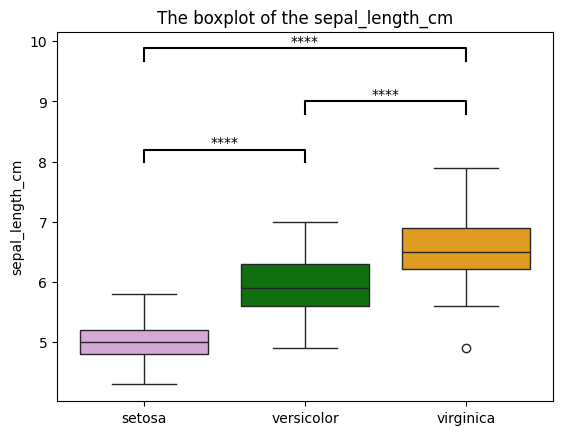

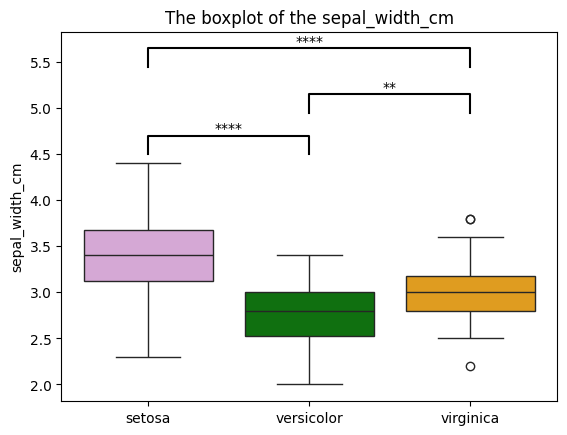

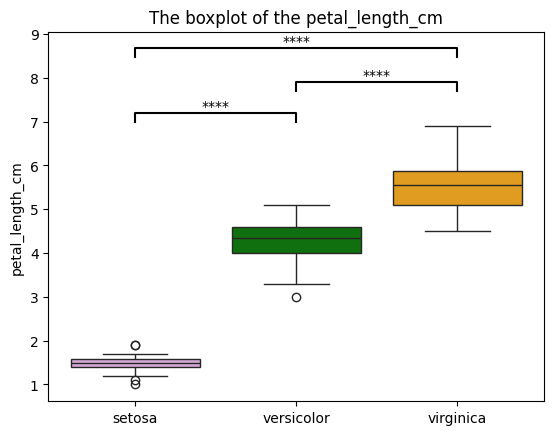

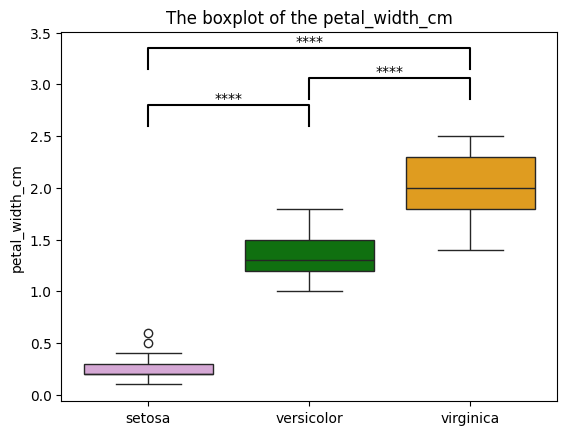

In [21]:
# The code taken from:
# https://bbquercus.medium.com/adding-statistical-significance-asterisks-to-seaborn-plots-9c8317383235
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

post_hoc_df["asterisks"] = [convert_pvalue_to_asterisks(padj) for padj in post_hoc_df["p-adj"]]
post_hoc_df["significant"] = [significance(asterisks) for asterisks in post_hoc_df["asterisks"]]
post_hoc_df



for feature in features:
    
    # Create a colour palette to color code boxes
    palette = ['plum', 'g', 'orange']

    # Create a boxplot
    boxplot = sns.boxplot(data=df, x="species", y=feature, hue='species', palette=palette
                         )
    
    
    sig_val = post_hoc_df[post_hoc_df["feature"] == feature]["significant"].tolist()
    asterisks = post_hoc_df[post_hoc_df["feature"] == feature]["asterisks"].tolist()
    
    # statistical annotation
    x1, x2, x3 = 0, 1, 2 
    y, h, col = df[feature].max() + 0.1, 0.2, 'k'

    if sig_val[0] == "Yes":
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, asterisks[0], ha='center', va='bottom', color=col)
        y += (y*0.1)
    
    if sig_val[1] == "Yes":
        
        plt.plot([x2, x2, x3, x3], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x2+x3)*.5, y+h, asterisks[2], ha='center', va='bottom', color=col)
        y += (y*0.1)
    
    if sig_val[2] == "Yes":
        plt.plot([x1, x1, x3, x3], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x3)*.5, y+h, asterisks[1], ha='center', va='bottom', color=col)

    

    plt.xlabel(None)
    plt.ylabel(feature)
    plt.title(f"The boxplot of the {feature}")
    plt.show()
    print("""
    
    """)
    

## Conclusion